# Loading Libraries


In [33]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing,svm
from sklearn.model_selection import train_test_split

# Loading Dataset

In [34]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_9245862a74a54d139e127d284c7e66df = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='1AtGWpFzuzzBWvt6fjmV9QvE0qWK-0yFOd_ayGrXXBx4',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_9245862a74a54d139e127d284c7e66df.get_object(Bucket='lifeexpctancy-donotdelete-pr-ojns4kb2negshc',Key='datasets_12603_17232_Life Expectancy Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data = pd.read_csv(body, na_values = ['NaN)'])
df_data.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# Checking Data Types

In [35]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [36]:
df_data.isnull().values.any()

True

In [37]:
from sklearn.impute import SimpleImputer

In [38]:
df_data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [39]:
missing_cols = ['Life expectancy ', 'Adult Mortality', 'Alcohol', 'Hepatitis B',
        ' BMI ', 'Polio', 'Total expenditure',
       'Diphtheria ', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']

imputer = SimpleImputer(missing_values = np.nan,  
                        strategy ='mean')
imputer.fit(df_data[missing_cols])
df_data[missing_cols] = imputer.transform(df_data[missing_cols])

In [40]:
df_data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [41]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2938 non-null float64
Adult Mortality                    2938 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2938 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2938 non-null float64
Measles                            2938 non-null int64
 BMI                               2938 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2938 non-null float64
Total expenditure                  2938 non-null float64
Diphtheria                         2938 non-null float64
 HIV/AIDS                          2938 non-null

In [42]:
df_data.isnull().values.any()

False

In [43]:
df_data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.938190,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.507640,124.080302,117.926501,3.916288,1987.914858,22.586855,11467.272489,19.927677,160.445548,23.352143,2.400274,23.640073,5.077785,13136.800417,5.381546e+07,4.394535,4.482708,0.204820,3.264381
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,80.940461,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,72.000000,144.000000,3.000000,4.160000,64.912906,87.000000,17.000000,43.000000,4.000000,93.000000,5.938190,93.000000,0.100000,3116.561755,3.675929e+06,3.400000,3.400000,0.662000,12.100000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,7483.158469,1.275338e+07,7.100000,7.200000,0.772000,14.100000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [44]:
df_data.corr(method = 'pearson')

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.169623,-0.078861,-0.037415,-0.048168,0.031400,0.089398,-0.082493,0.108327,-0.042937,0.093820,0.081860,0.133853,-0.139741,0.093351,0.014951,-0.047592,-0.050627,0.236333,0.203471
Life expectancy,0.169623,1.000000,-0.696359,-0.196535,0.391598,0.381791,0.203771,-0.157574,0.559255,-0.222503,0.461574,0.207981,0.475418,-0.556457,0.430493,-0.019638,-0.472162,-0.466629,0.692483,0.715066
Adult Mortality,-0.078861,-0.696359,1.000000,0.078747,-0.190408,-0.242814,-0.138591,0.031174,-0.381449,0.094135,-0.272694,-0.110875,-0.273014,0.523727,-0.277053,-0.012501,0.299863,0.305366,-0.440062,-0.435108
infant deaths,-0.037415,-0.196535,0.078747,1.000000,-0.113812,-0.085612,-0.178783,0.501128,-0.227220,0.996629,-0.170674,-0.126564,-0.175156,0.025231,-0.107109,0.548522,0.465590,0.471228,-0.143663,-0.191757
Alcohol,-0.048168,0.391598,-0.190408,-0.113812,1.000000,0.339634,0.075447,-0.051055,0.318070,-0.110777,0.213744,0.294898,0.215242,-0.048650,0.318591,-0.030765,-0.416946,-0.405881,0.416099,0.497546
percentage expenditure,0.031400,0.381791,-0.242814,-0.085612,0.339634,1.000000,0.011679,-0.056596,0.228537,-0.087852,0.147203,0.173414,0.143570,-0.097857,0.888140,-0.024648,-0.251190,-0.252725,0.380374,0.388105
Hepatitis B,0.089398,0.203771,-0.138591,-0.178783,0.075447,0.011679,1.000000,-0.090317,0.134929,-0.184413,0.408519,0.050084,0.499958,-0.102405,0.062318,-0.109811,-0.105144,-0.108334,0.150992,0.171755
Measles,-0.082493,-0.157574,0.031174,0.501128,-0.051055,-0.056596,-0.090317,1.000000,-0.175925,0.507809,-0.136146,-0.104569,-0.141861,0.030899,-0.068060,0.236250,0.224742,0.221007,-0.115764,-0.122609
BMI,0.108327,0.559255,-0.381449,-0.227220,0.318070,0.228537,0.134929,-0.175925,1.000000,-0.237586,0.282156,0.231814,0.281059,-0.243548,0.276645,-0.063238,-0.532025,-0.538911,0.479837,0.508105
under-five deaths,-0.042937,-0.222503,0.094135,0.996629,-0.110777,-0.087852,-0.184413,0.507809,-0.237586,1.000000,-0.188703,-0.128269,-0.195651,0.038062,-0.110640,0.535864,0.467626,0.472099,-0.161533,-0.207111


In [45]:
import seaborn as sns

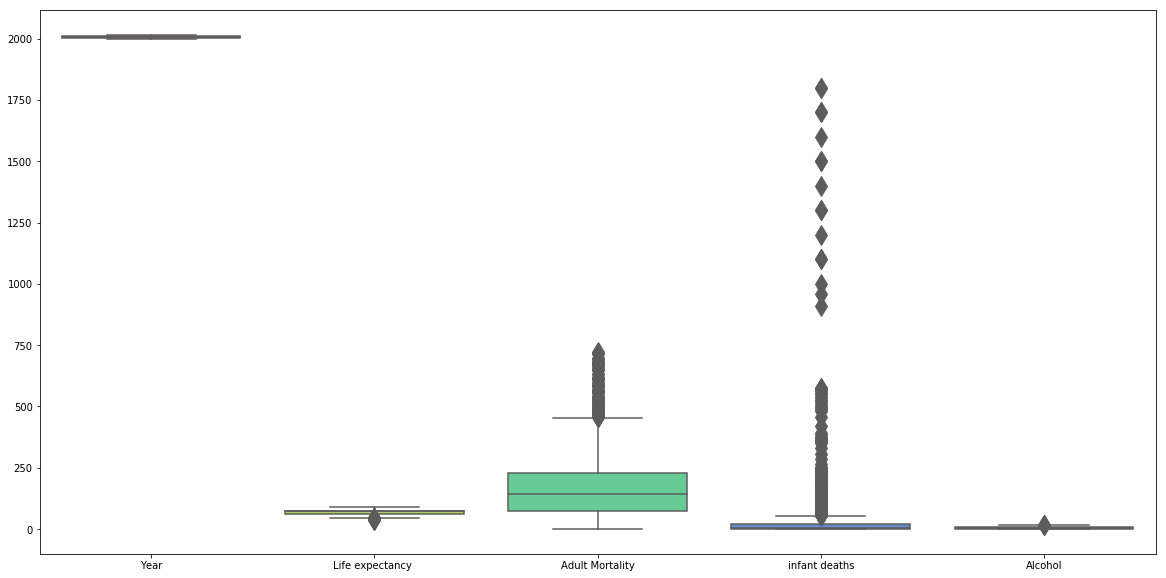

In [46]:
fig, ax = plt.subplots(figsize=(20,10))

# Attributes destribution
a = sns.boxplot(orient="v", palette="hls", data=df_data.iloc[:, :7], fliersize=14)

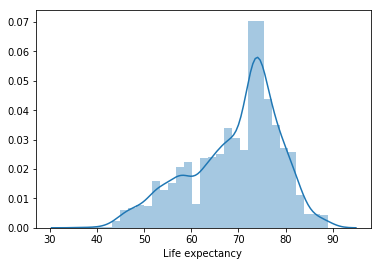

In [47]:
histogram = sns.distplot(df_data.iloc[:,3], hist = True)
plt.show()

# For outliers

In [48]:
# Detect outlier using interquartile method and remove them
def find_outliers(df):
    quartile_1, quartile_3 = np.percentile(df, [15, 85])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)

    outlier_indices = list(df.index[(df < lower_bound)|(df > upper_bound)])
    outlier_values = list(df[outlier_indices])
    
    df[outlier_indices] = np.NaN
    
    return df

In [49]:
print(find_outliers(df_data['Adult Mortality']))

0       263.0
1       271.0
2       268.0
3       272.0
4       275.0
5       279.0
6       281.0
7       287.0
8       295.0
9       295.0
10      291.0
11      293.0
12      295.0
13        3.0
14      316.0
15      321.0
16       74.0
17        8.0
18       84.0
19       86.0
20       88.0
21       91.0
22       91.0
23        1.0
24        9.0
25       99.0
26       15.0
27       17.0
28       18.0
29       15.0
        ...  
2908    328.0
2909    349.0
2910    366.0
2911    363.0
2912    368.0
2913     45.0
2914    487.0
2915    526.0
2916    554.0
2917    578.0
2918     64.0
2919     69.0
2920    611.0
2921    614.0
2922    336.0
2923    371.0
2924    399.0
2925    429.0
2926    464.0
2927    527.0
2928    587.0
2929    632.0
2930     67.0
2931      7.0
2932      NaN
2933      NaN
2934      NaN
2935     73.0
2936      NaN
2937      NaN
Name: Adult Mortality, Length: 2938, dtype: float64


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [50]:
print(find_outliers(df_data['infant deaths']))

0       62.0
1       64.0
2       66.0
3       69.0
4       71.0
5       74.0
6       77.0
7       80.0
8       82.0
9       84.0
10      85.0
11      87.0
12      87.0
13      88.0
14      88.0
15      88.0
16       0.0
17       0.0
18       0.0
19       0.0
20       0.0
21       1.0
22       1.0
23       1.0
24       1.0
25       1.0
26       1.0
27       1.0
28       1.0
29       1.0
        ... 
2908    29.0
2909    29.0
2910    29.0
2911    30.0
2912    30.0
2913    31.0
2914    32.0
2915    33.0
2916    34.0
2917    36.0
2918    39.0
2919    41.0
2920    43.0
2921    44.0
2922    22.0
2923    23.0
2924    25.0
2925    26.0
2926    28.0
2927    29.0
2928    30.0
2929    30.0
2930    29.0
2931    28.0
2932    28.0
2933    27.0
2934    26.0
2935    25.0
2936    25.0
2937    24.0
Name: infant deaths, Length: 2938, dtype: float64


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [51]:
print(find_outliers(df_data['percentage expenditure']))

0        71.279624
1        73.523582
2        73.219243
3        78.184215
4         7.097109
5        79.679367
6        56.762217
7        25.873925
8        10.910156
9        17.171518
10        1.388648
11       15.296066
12       11.089053
13       16.887351
14       10.574728
15       10.424960
16      364.975229
17      428.749067
18      430.876979
19      412.443356
20      437.062100
21       41.822757
22      348.055952
23       36.622068
24       32.246552
25        3.302154
26       26.993121
27      221.842800
28       14.719289
29      104.516916
           ...    
2908     20.623063
2909    196.915250
2910    183.046170
2911    184.364910
2912    143.869887
2913    153.678375
2914     10.851482
2915      1.860004
2916    121.879331
2917      8.369852
2918     65.789974
2919     54.043480
2920     46.830275
2921     45.616880
2922      0.000000
2923     10.822595
2924     10.666707
2925     92.602336
2926     63.750530
2927     53.308581
2928      1.040021
2929     20.

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [52]:
print(find_outliers(df_data['under-five deaths ']))

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0        83.0
1        86.0
2        89.0
3        93.0
4        97.0
5       102.0
6       106.0
7       110.0
8       113.0
9       116.0
10      118.0
11      120.0
12      122.0
13      122.0
14      122.0
15      122.0
16        0.0
17        1.0
18        1.0
19        1.0
20        1.0
21        1.0
22        1.0
23        1.0
24        1.0
25        1.0
26        1.0
27        1.0
28        1.0
29        1.0
        ...  
2908     42.0
2909     43.0
2910     44.0
2911     45.0
2912     47.0
2913     49.0
2914     51.0
2915     52.0
2916     55.0
2917     59.0
2918     62.0
2919     66.0
2920     70.0
2921     72.0
2922     32.0
2923     34.0
2924     36.0
2925     39.0
2926     42.0
2927     44.0
2928     45.0
2929     46.0
2930     46.0
2931     45.0
2932     43.0
2933     42.0
2934     41.0
2935     40.0
2936     39.0
2937     39.0
Name: under-five deaths , Length: 2938, dtype: float64


In [53]:
print(find_outliers(df_data['Income composition of resources']))

0       0.479
1       0.476
2       0.470
3       0.463
4       0.454
5       0.448
6       0.434
7       0.433
8       0.415
9       0.405
10      0.396
11      0.381
12      0.373
13      0.341
14      0.340
15      0.338
16      0.762
17      0.761
18      0.759
19      0.752
20      0.738
21      0.725
22      0.721
23      0.713
24      0.703
25      0.696
26      0.685
27      0.681
28      0.674
29      0.670
        ...  
2908    0.565
2909    0.554
2910    0.543
2911    0.533
2912    0.518
2913    0.504
2914    0.492
2915    0.479
2916    0.467
2917    0.456
2918    0.443
2919    0.433
2920    0.424
2921    0.418
2922    0.507
2923    0.498
2924    0.488
2925    0.464
2926    0.452
2927    0.436
2928    0.419
2929    0.421
2930    0.414
2931    0.408
2932    0.406
2933    0.407
2934    0.418
2935    0.427
2936    0.427
2937    0.434
Name: Income composition of resources, Length: 2938, dtype: float64


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [54]:
print(find_outliers(df_data['Schooling']))

0       10.1
1       10.0
2        9.9
3        9.8
4        9.5
5        9.2
6        8.9
7        8.7
8        8.4
9        8.1
10       7.9
11       6.8
12       6.5
13       6.2
14       5.9
15       5.5
16      14.2
17      14.2
18      14.2
19      14.2
20      13.3
21      12.5
22      12.2
23      12.0
24      11.6
25      11.4
26      10.8
27      10.9
28      10.7
29      10.7
        ... 
2908    12.5
2909    12.3
2910    12.0
2911    11.8
2912    11.6
2913    11.4
2914    11.1
2915    10.9
2916    10.7
2917    10.5
2918    10.2
2919    10.0
2920     9.8
2921     9.6
2922    10.3
2923    10.3
2924    10.4
2925     9.8
2926    10.1
2927    10.0
2928     9.9
2929     9.7
2930     9.6
2931     9.5
2932     9.3
2933     9.2
2934     9.5
2935    10.0
2936     9.8
2937     9.8
Name: Schooling, Length: 2938, dtype: float64


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [55]:
# Detect outlier using interquartile method and remove them
def find_outliers_bmi(df):
    quartile_1, quartile_3 = np.percentile(df, [10, 60])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)

    outlier_indices = list(df.index[(df < lower_bound)|(df > upper_bound)])
    outlier_values = list(df[outlier_indices])
    
    df[outlier_indices] = np.NaN
    
    return df

In [56]:
print(find_outliers_bmi(df_data[' BMI ']))

0       19.1
1       18.6
2       18.1
3       17.6
4       17.2
5       16.7
6       16.2
7       15.7
8       15.2
9       14.7
10      14.2
11      13.8
12      13.4
13      13.0
14      12.6
15      12.2
16      58.0
17      57.2
18      56.5
19      55.8
20      55.1
21      54.3
22      53.5
23      52.6
24      51.7
25       5.8
26      49.9
27      48.9
28      47.9
29      46.9
        ... 
2908    22.3
2909    21.7
2910    21.2
2911     2.7
2912     2.2
2913    19.7
2914    19.2
2915    18.8
2916    18.4
2917    18.0
2918    17.6
2919    17.3
2920    17.1
2921    16.8
2922    31.8
2923    31.3
2924     3.8
2925     3.3
2926    29.9
2927    29.4
2928    29.0
2929    28.6
2930    28.2
2931    27.9
2932    27.5
2933    27.1
2934    26.7
2935    26.3
2936    25.9
2937    25.5
Name:  BMI , Length: 2938, dtype: float64


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [57]:
changed_cols = ['Adult Mortality','percentage expenditure', 'infant deaths',' BMI ', 'under-five deaths ', 'Income composition of resources', 'Schooling']

imputer = SimpleImputer(missing_values = np.nan,  
                        strategy ='mean')
imputer.fit(df_data[changed_cols])
df_data[changed_cols] = imputer.transform(df_data[changed_cols])

In [58]:
features = df_data.iloc[:,4:]
features.head()

,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,263.0,62.0,0.01,71.279624,65.0,1154,19.1,83.0,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,271.0,64.0,0.01,73.523582,62.0,492,18.6,86.0,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,268.0,66.0,0.01,73.219243,64.0,430,18.1,89.0,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,272.0,69.0,0.01,78.184215,67.0,2787,17.6,93.0,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,275.0,71.0,0.01,7.097109,68.0,3013,17.2,97.0,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [59]:
target = df_data.iloc[:,3]
target.head()

0    65.0
1    59.9
2    59.9
3    59.5
4    59.2
Name: Life expectancy , dtype: float64

In [60]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42)

In [61]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(2056, 18) (2056,)
(882, 18) (882,)


In [62]:
scaler = preprocessing.StandardScaler().fit(x_train,y_train)
x_train_scaled = scaler.transform(x_train)
pd.DataFrame(x_train_scaled, columns=pd.DataFrame(x_train).columns).head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,-0.821539,-0.638625,0.646753,-0.009194,0.217072,-0.197728,1.399476,-0.614512,-0.463608,0.916824,-0.447705,-0.318492,1.128313,-0.273830,-0.938301,-0.930386,0.903550,0.791656
1,1.940595,-0.226425,-0.654250,-0.609878,-0.007143,-0.185236,-0.849775,-0.152430,-0.893159,-1.457775,-0.871040,0.800428,0.013010,0.025678,0.906976,0.809688,-0.670702,-0.820185
2,1.011514,1.628471,-0.012659,-0.404871,0.482963,4.464458,-1.130305,2.122436,0.352540,0.610157,0.398965,-0.125574,-0.522067,-0.239296,1.020882,0.876614,-1.365956,-1.905077
3,1.061734,-0.432525,-0.262167,-0.507672,0.217072,-0.197814,-0.749586,-0.365699,0.094809,-0.197953,0.144964,0.761845,-0.511261,-0.237364,0.679164,0.631219,-1.097787,-0.944172
4,0.459087,2.349819,-1.104891,-0.608537,0.172757,-0.104083,-1.055163,2.157981,0.051854,-1.764442,0.144964,-0.222033,-0.561542,0.884272,1.909348,1.925120,-0.730295,-1.223145


In [63]:
x_test_scaled = scaler.transform(x_test)
pd.DataFrame(x_test_scaled, columns=pd.DataFrame(x_test).columns).head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,-0.327703,-0.226425,-0.924125,-0.299998,0.084126,-0.153275,0.492762,-0.259064,0.008899,-0.894170,-3.157048,-0.318492,-0.428685,0.170944,0.360227,0.318898,0.024551,-0.200246
1,-0.411404,-0.638625,1.840825,3.320461,-0.007143,-0.197728,0.973671,-0.614512,0.567316,0.419526,0.568299,-0.318492,0.312593,-0.274984,-0.687707,-0.684991,0.754567,0.574677
2,-0.310963,-0.638625,0.096818,1.104393,-3.195197,-0.197814,0.928586,-0.614512,0.395496,0.332499,0.398965,-0.318492,-0.104809,-0.260475,-0.619364,-0.595757,0.650279,0.481687
3,-1.298635,-0.638625,-0.771366,0.317990,0.748854,-0.193851,1.214125,-0.614512,0.653227,-0.396872,0.652966,-0.318492,1.364150,0.025678,0.291884,0.251972,0.938313,0.760659
4,2.225179,3.328792,-0.786642,-0.608155,-0.007143,1.611511,-1.215466,3.686407,-3.212738,-0.521196,-0.024370,3.154018,-0.561347,-0.200837,0.998101,0.943540,-0.909075,-1.130154


In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
mlmodel = LinearRegression()
mlmodel.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [66]:
y_pred = mlmodel.predict(x_test)

In [67]:
print(y_pred)

[67.29727505 77.30393924 76.54299801 78.95071857 43.61377894 50.09495308
 68.88363461 70.91873955 75.76691971 55.84417341 49.99595427 61.42160108
 64.29712112 72.20733831 70.25573501 62.95394087 53.91836409 79.40879544
 69.05708743 81.06776777 81.09433675 83.39592449 71.25084138 70.08001239
 71.060614   68.56208868 60.85823029 62.61903592 78.5707318  72.54485799
 64.27942946 76.08786646 69.1171907  69.28145302 80.11823116 52.8607221
 63.67759484 73.05341422 62.56189389 76.7246474  57.93355629 64.17039639
 75.80463266 80.7439079  76.75010122 57.18197545 78.22140639 71.72113345
 65.05785467 62.1719924  57.35846944 61.88394248 79.16405657 72.8648161
 74.03408716 56.50153429 76.34466562 72.37367978 67.55532397 66.41070262
 75.27443417 55.11916313 73.49933607 70.60894093 51.66661191 49.94534882
 53.57771193 80.0041075  59.74087438 76.91320152 80.67496496 75.95590621
 74.31059282 57.69444072 53.91418673 71.26451353 63.27874028 77.50109403
 56.51015706 63.24055456 63.39272658 61.68192844 67.9

In [68]:
from sklearn.metrics import accuracy_score,mean_squared_error, r2_score, average_precision_score

In [69]:
def model_metrics(regressor,y_test,y_pred):
    mse = mean_squared_error(y_test,y_pred)
    print("Mean squared error: %.2f"
      % mse)
    r2 = r2_score(y_test, y_pred)
    print('R2 score: %.2f' % r2 )
    return [mse, r2]

In [70]:
mlMetrics = model_metrics(mlmodel, y_test, y_pred)

Mean squared error: 16.33
R2 score: 0.83


# Save model

In [71]:
wml_credentials = {
  "apikey": "06_uP9IfVE3-mPmHYQJN-l5LFXxDlMGvVUDj1L-e5lsi",
  "iam_apikey_description": "Auto-generated for key 7ff3fede-6757-4d15-a839-bc3c280f9c82",
  "iam_apikey_name": "wdp-writer",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/1c96753984394d9c8256e8c335b859be::serviceid:ServiceId-5583ad01-91ce-49a7-b6ca-ae163f027dc7",
  "instance_id": "e7e7a66c-3d70-4aac-bf25-92c675fa6c48",
  "url": "https://us-south.ml.cloud.ibm.com"
}

In [72]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient
client = WatsonMachineLearningAPIClient( wml_credentials )

In [73]:
print(wml_credentials['apikey'])

06_uP9IfVE3-mPmHYQJN-l5LFXxDlMGvVUDj1L-e5lsi


In [74]:
import requests

url     = "https://iam.bluemix.net/oidc/token"
headers = { "Content-Type" : "application/x-www-form-urlencoded" }
data    = "apikey=" + wml_credentials['apikey'] + "&grant_type=urn:ibm:params:oauth:grant-type:apikey"
IBM_cloud_IAM_uid = "bx"
IBM_cloud_IAM_pwd = "bx"
response  = requests.post( url, headers=headers, data=data, auth=( IBM_cloud_IAM_uid, IBM_cloud_IAM_pwd ) )
iam_token = response.json()["access_token"]

In [75]:
# Save your model

model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "Zainab Bubere", 
               client.repository.ModelMetaNames.NAME: "Life Expectancy Prediction Model without outliers"}

In [76]:
# Publish model in Watson Machine Learning repository on Cloud
published_model = client.repository.store_model(model=mlmodel, meta_props=model_props, \
                                                training_data=x_train, training_target=y_train)